In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/snsd-tickets-analysis/girlgeneration(utf8)(1).csv


## Task1

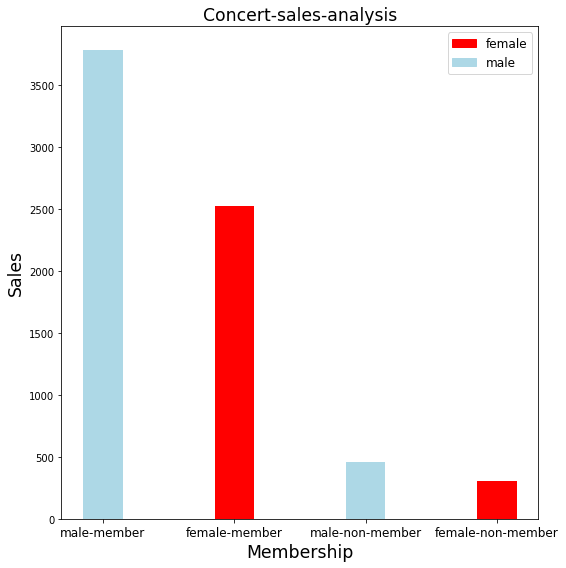

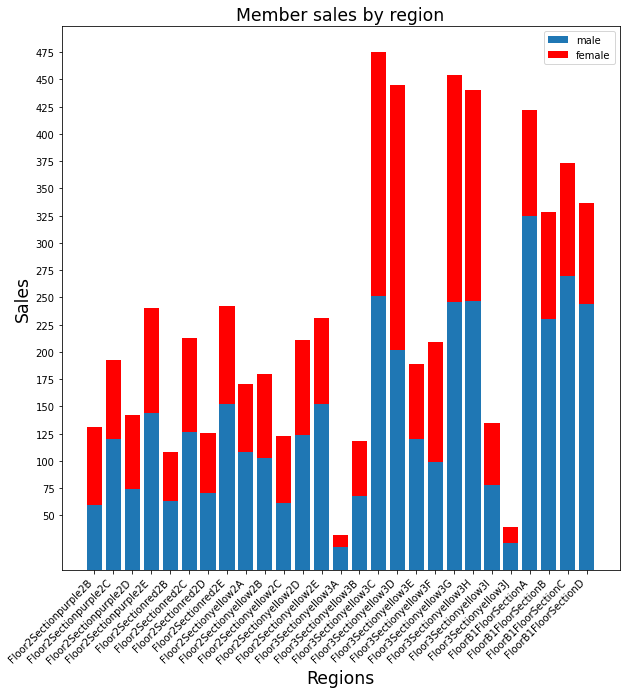

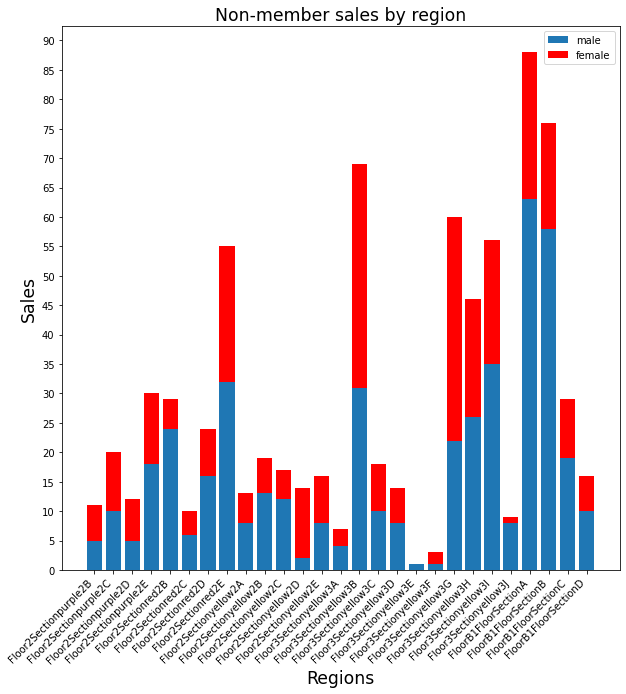

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

df=pd.read_csv('../input/snsd-tickets-analysis/girlgeneration(utf8)(1).csv')
df.rename(columns={'T_STANDARD_TICKET_TYPE_NAME':'TICKET_TYPE', 'SEAT_REGION_NAME':'SEAT_TYPE'}, inplace=True)

female=df.groupby(['SEX']).get_group('female') #女
female_member=female.groupby(['TICKET_TYPE']).get_group('member') #女會員
female_non_member=female.groupby(['TICKET_TYPE']).get_group('non-member') #女非會員
male=df.groupby(['SEX']).get_group('male') #男
male_member=male.groupby(['TICKET_TYPE']).get_group('member') #男會員
male_non_member=male.groupby(['TICKET_TYPE']).get_group('non-member') #男非會員

member_or_not=['male-member', 'female-member', 'male-non-member', 'female-non-member']
list_all=[len(male_member), len(female_member), len(male_non_member), len(female_non_member)]
color=['lightblue', 'red', 'lightblue', 'red']
x = np.arange(len(member_or_not))
plt.figure(figsize=(8, 8))
plt.bar(x, list_all, width=0.3, align='center', color=color)
plt.title('Concert-sales-analysis', fontsize='xx-large')
plt.xlabel('Membership', fontsize='xx-large')
plt.xticks(x, member_or_not, fontsize='large')
plt.ylabel('Sales', fontsize='xx-large')
red_patch = mpatches.Patch(color='red',  label='female')
blue_patch = mpatches.Patch(color='lightblue',  label='male')
plt.legend(loc='upper right', fontsize='large', handles=[red_patch, blue_patch])
plt.tight_layout()

female_member_list=[]
female_non_member_list=[]
male_member_list=[]
male_non_member_list=[]
for i in df.groupby(['SEAT_TYPE', 'SEX', 'TICKET_TYPE'], group_keys=False):
    #print(i[0][0], '/', i[0][1], '/', i[0][2], ': ', len(i[1]))
    if (i[0][0] == 'Floor3Sectionyellow3E' and
            i[0][1] == 'female' and
            i[0][2] == 'member'):
        female_member_list.append(len(i[1]))
        female_non_member_list.append(0)
        #print('Floor3Sectionyellow3E / female / non-member: 0')
        continue
    if i[0][1] == 'female':
        if i[0][2] == 'member':
            female_member_list.append(len(i[1]))
        else:
            female_non_member_list.append(len(i[1]))
    else:
        if i[0][2] == 'member':
            male_member_list.append(len(i[1]))
        else:
            male_non_member_list.append(len(i[1]))

xticks_regions=sorted(df['SEAT_TYPE'].unique())
x=np.arange(len(female_member_list))

#Stacked bar chart
#member_list
plt.figure(figsize=(10, 10))
plt.title('Member sales by region', fontsize='xx-large')
plt.xlabel('Regions', fontsize='xx-large')
plt.ylabel('Sales', fontsize='xx-large')
plt.xticks(x, xticks_regions, rotation=45, ha='right')
plt.yticks(np.arange(50, 550, 25))
plt.bar(x, male_member_list, label='male')
plt.bar(x, female_member_list, bottom=male_member_list, color='red', label='female')
plt.legend()

#Stacked bar chart
#non_member_list
plt.figure(figsize=(10, 10))
plt.title('Non-member sales by region', fontsize='xx-large')
plt.xlabel('Regions', fontsize='xx-large')
plt.ylabel('Sales', fontsize='xx-large')
plt.xticks(x, xticks_regions, rotation=45, ha='right')
plt.yticks(np.arange(0, 100, 5))
plt.bar(x, male_non_member_list, label='male')
plt.bar(x, female_non_member_list, bottom=male_non_member_list, color='red', label='female')
plt.legend()

plt.show()


## Task2

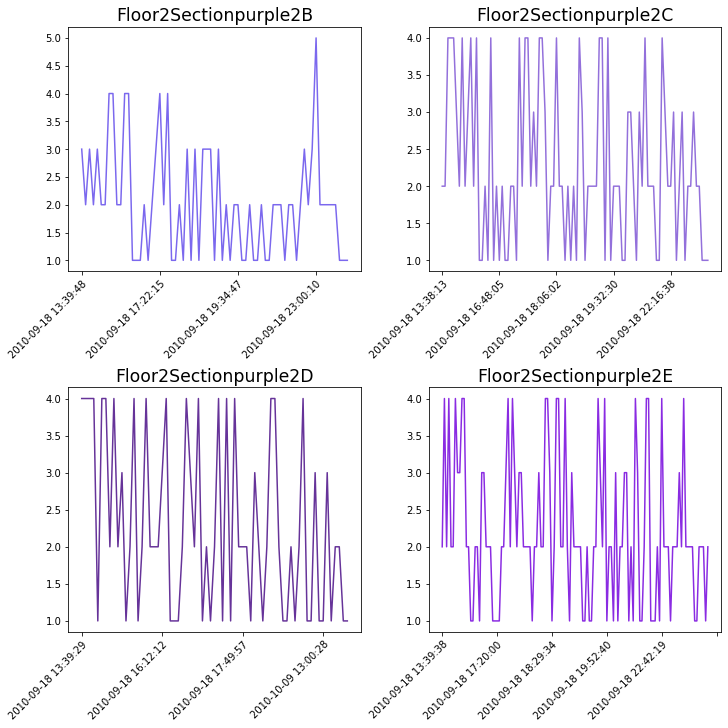

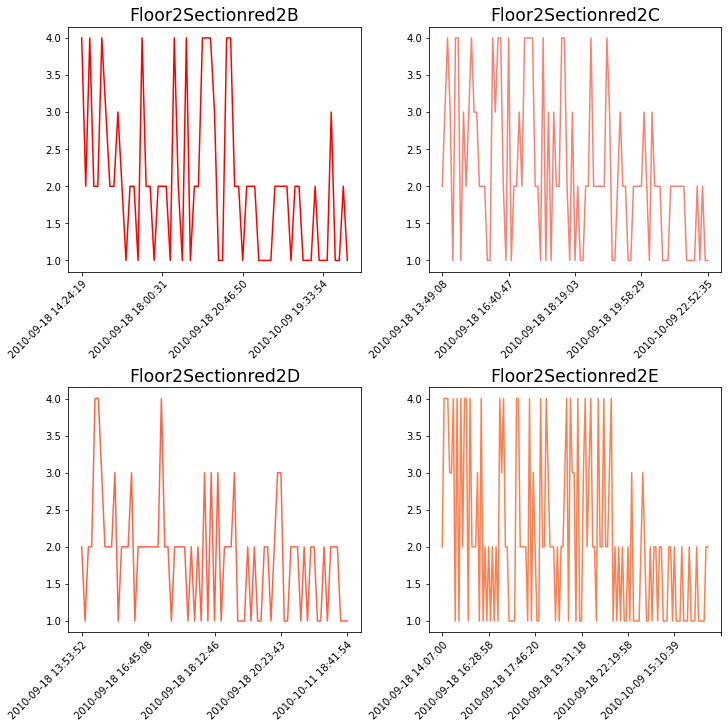

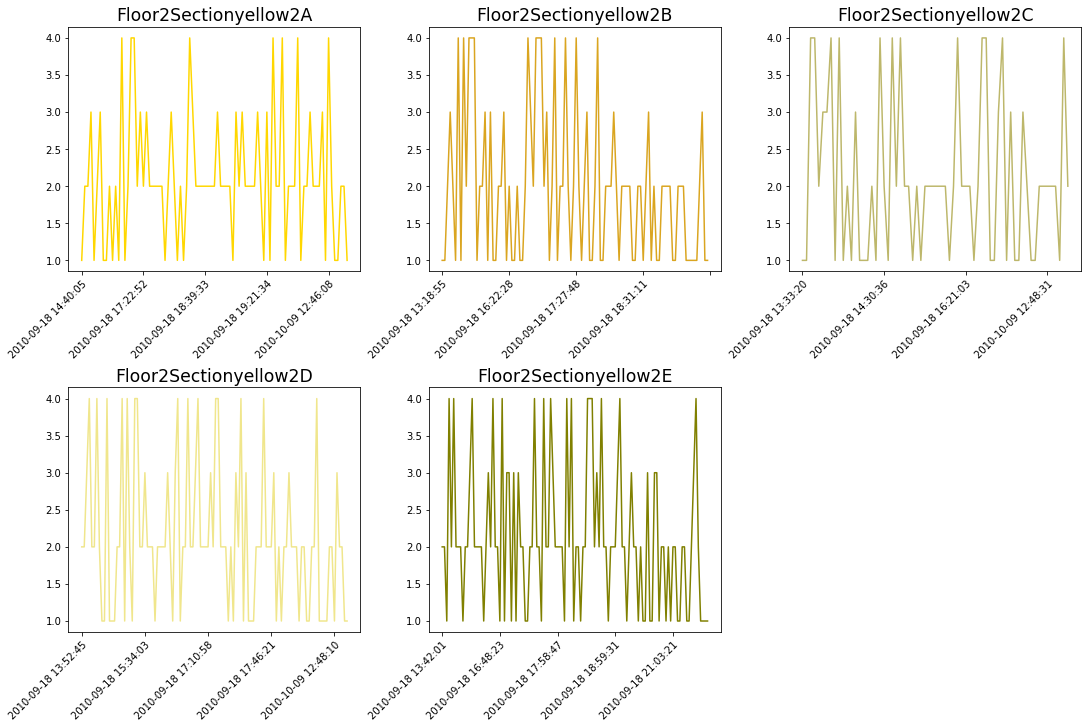

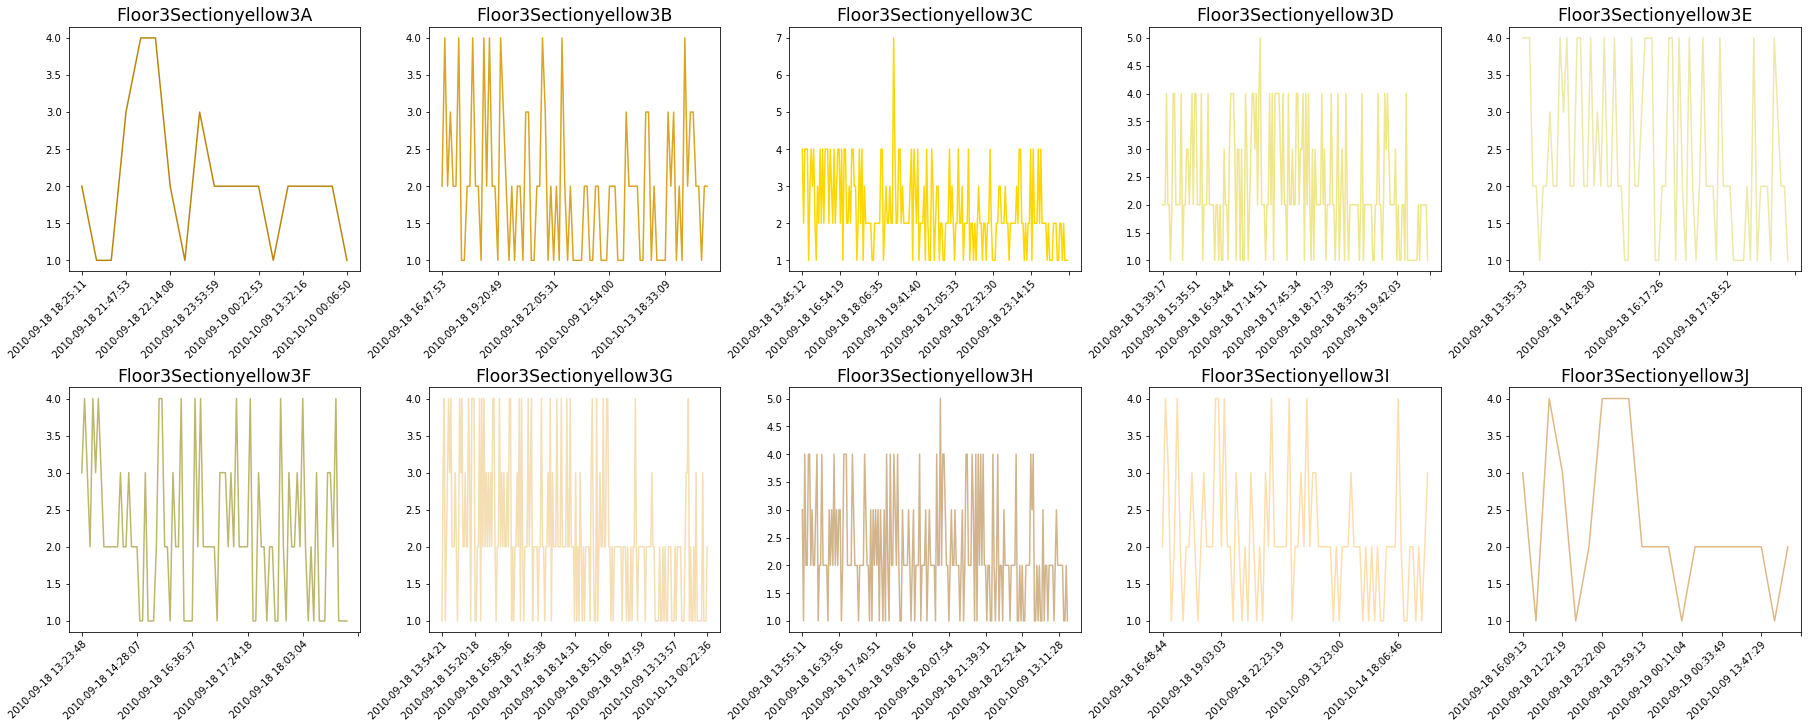

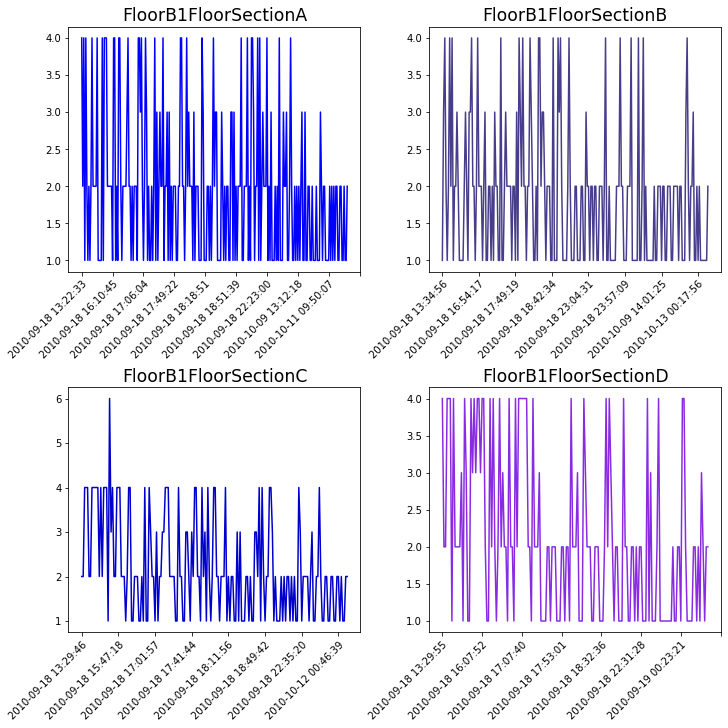

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df=pd.read_csv('../input/snsd-tickets-analysis/girlgeneration(utf8)(1).csv')

df.rename(columns={'T_STANDARD_TICKET_TYPE_NAME':'TICKET_TYPE', 'SEAT_REGION_NAME':'SEAT_TYPE'}, inplace=True)

# Data Processing - convert wrong date time format to the correct one
# Replace "." with empty space in CREATE_DATE and copy data to MY_DATE
df['MY_DATE'] = df.CREATE_DATE.str.replace('.', '', regex=False)

# Apply datetime object with correct format to MY_DATE
df['MY_DATE'] = pd.to_datetime(df['MY_DATE'].str.strip(), format='%Y/%m/%d %p %I:%M:%S')

df = df.sort_values(by='MY_DATE', ascending=True)

for i in df['SEAT_TYPE']:
    exec(i + '_num = []')
    exec(i + '_time = []')

for i in df.groupby(['SEAT_TYPE', 'MY_DATE']):
    # i會印出好長一串, i[0]會得到 ('Floor2Sectionpurple2B', Timestamp('2010-09-18 13:39:48'))
    # 然後這是一個tuple , i[0][0]會得到 'Floor2sectionPurple2B', i[0][1]得到Timestamp, 
    #print(i[0][0], '/', i[0][1], len(i[1])) #zones & date & number of ticks sales
    #print(i[0][1])
    exec(i[0][0] + '_num.append(len(i[1]))')
    time = str(i[0][1]).replace('Timestamp','')
    exec(i[0][0] + '_time.append("' + time + '")')

def get_base(length):
        if length<25:
            return 3
        elif length<50:
            return 15
        elif length<100:
            return 20
        elif length<200:
            return 25
        else:
            return 30

def draw(a, b, c, d, region, colors):
    fig, ax = plt.subplots(a, b, constrained_layout = True, figsize=(c, d))

    tmp_list = []
    for i in sorted(df['SEAT_TYPE'].unique()):
        if i.__contains__(region):
            tmp_list.append(i)

    for n, region in enumerate(tmp_list):
        i = int(n/b)
        j = n%b
        ax[i, j].set_title(region, fontsize='xx-large')
        ax[i, j].plot(eval(region + '_time'), eval(region + '_num'), color=colors[n])
        ax[i, j].xaxis.set_major_locator(ticker.MultipleLocator(base=get_base(len(eval(region + '_time')))))
        plt.setp(ax[i, j].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    remain = len(tmp_list) % b
    if remain != 0:
        for i in np.arange(remain, b):
            plt.delaxes(ax[a-1, i])

draw(2, 2, 10, 10, 'Floor2Sectionpurple', ['mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet'])
draw(2, 2, 10, 10, 'Floor2Sectionred', ['red', 'salmon', 'tomato', 'coral'])
draw(2, 3, 15, 10, 'Floor2Sectionyellow', ['gold', 'goldenrod', 'darkkhaki', 'khaki', 'olive'])
draw(2, 5, 25, 10, 'Floor3Sectionyellow',
    ['darkgoldenrod', 'goldenrod', 'gold', 'khaki', 'palegoldenrod', 'darkkhaki', 'wheat', 'tan', 'navajowhite', 'burlywood'])
draw(2, 2, 10, 10, 'FloorB1FloorSection', ['blue', 'darkslateblue', 'mediumblue', 'blueviolet'])

plt.show()
